# Binary Image Classfication Dog vs Cats
### TODOS:
####   Create a new archtikture 
####   Directorys for Pictures 
####   Image Generator for robust model
####   Complie 
####   fit model
####   accuracy  
####   save model

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory


2025-01-03 12:21:02.208994: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 12:21:02.215836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735903262.224008  148085 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735903262.226381  148085 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-03 12:21:02.235136: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
# Anzeigen der verfügbaren Geräte
devices = tf.config.list_physical_devices()
for device in devices:
    print(device)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


##### Set Dircetory for Images
----

In [ ]:
import os
import shutil
import pathlib

# Ursprünglicher Datenordner
original_dir = pathlib.Path("Data")  # Oberordner der Kategorien
new_base_dir = pathlib.Path("cats_vs_dogs_small")  # Zielbasisordner

def make_subset(subset_name, start_index, end_index):
    # Kategorien (Ordner: Cat und Dog)
    for category in ("Cat", "Dog"):
        # Neues Zielverzeichnis erstellen
        dir = new_base_dir / subset_name / category.lower()  # Kategorienamen in Kleinbuchstaben
        os.makedirs(dir, exist_ok=True)  # Ordner erstellen, falls nicht vorhanden

        # Bilder dieser Kategorie auswählen
        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            # Quell- und Zielpfade definieren
            src = original_dir / category / fname
            dst = dir / fname

            # Datei kopieren, wenn sie existiert
            if src.exists():
                shutil.copyfile(src, dst)

# Teilmengen erstellen
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)


In [29]:
import os
os.chdir("/home/riccardodandrea/Schreibtisch/Github/SceneDetect")
print(os.getcwd())
train_dataset = image_dataset_from_directory(
    "100_pics/train",
    image_size=(180, 180),
    batch_size=32)
    
validation_dataset = image_dataset_from_directory(
    "100_pics/validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "100_pics/test",
    image_size=(180, 180),
    batch_size=32)

/home/riccardodandrea/Schreibtisch/Github/SceneDetect
Found 80 files belonging to 1 classes.
Found 21 files belonging to 1 classes.
Found 21 files belonging to 1 classes.


In [24]:
from tensorflow.keras.utils import image_dataset_from_directory

# Lade den gesamten Trainingsdatensatz
train_dataset_full = image_dataset_from_directory(
    "cats_vs_dogs_vs_horses/train",
    image_size=(180, 180),
    batch_size=32
)

# Lade den gesamten Validierungsdatensatz
validation_dataset_full = image_dataset_from_directory(
    "cats_vs_dogs_vs_horses/validation",
    image_size=(180, 180),
    batch_size=32
)

# Lade den gesamten Testdatensatz
test_dataset_full = image_dataset_from_directory(
    "cats_vs_dogs_vs_horses/test",
    image_size=(180, 180),
    batch_size=32
)

# Begrenze die Anzahl der Bilder auf 100
train_dataset = train_dataset_full.take(96 // 32)  # Nimm ca. 100 Bilder (32 Bilder pro Batch)
validation_dataset = validation_dataset_full.take(100 // 32)
test_dataset = test_dataset_full.take(100 // 32)

# Optional: Überprüfe die Größe der Datensätze
print(f"Train dataset batches: {len(train_dataset)}")
print(f"Validation dataset batches: {len(validation_dataset)}")
print(f"Test dataset batches: {len(test_dataset)}")


Found 2999 files belonging to 3 classes.
Found 1500 files belonging to 3 classes.
Found 1086 files belonging to 3 classes.
Train dataset batches: 3
Validation dataset batches: 3
Test dataset batches: 3


In [13]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [31]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

2025-01-03 13:43:15.206870: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


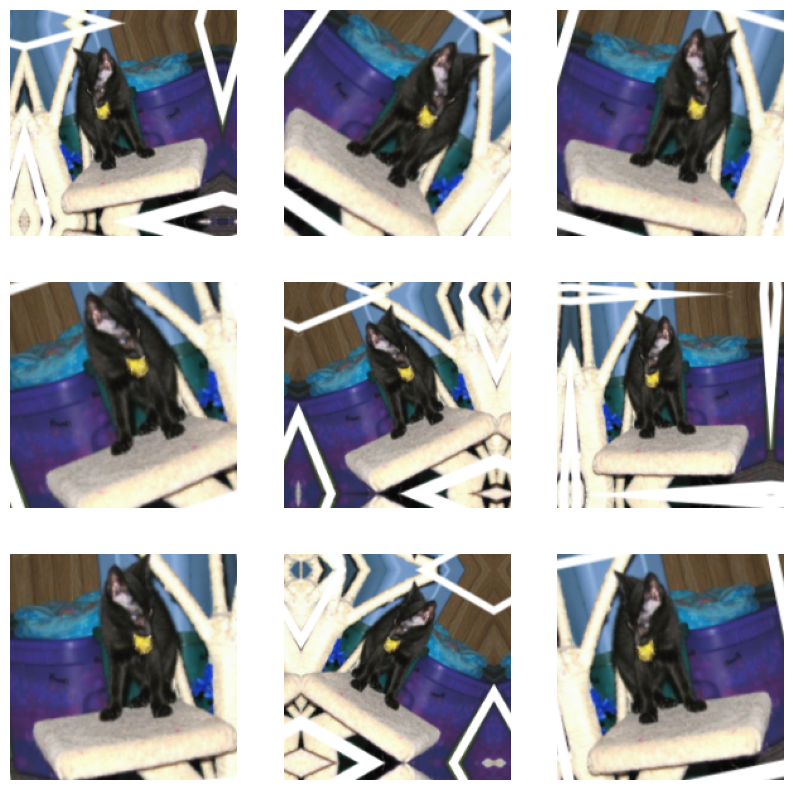

In [32]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1): #welches bild
    for i in range(9): # bilder anzahl
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1) # wie viele plots
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [33]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [34]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss="binary_crossentropy",
            optimizer="rmsprop",
            metrics=["accuracy"])

In [ ]:
# callbacks = [
# keras.callbacks.ModelCheckpoint(
# filepath="GPU_convnet_from_scratch_with_augmentation.keras",
# save_best_only=True,
# monitor="val_loss")
# ]

In [36]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    #callbacks=callbacks
    )


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step - accuracy: 0.7305 - loss: 0.4023 - val_accuracy: 1.0000 - val_loss: 6.9217e-10
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 2.1152e-08 - val_accuracy: 1.0000 - val_loss: 6.9164e-10
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 1.7139e-08 - val_accuracy: 1.0000 - val_loss: 6.9146e-10
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 3.0529e-08 - val_accuracy: 1.0000 - val_loss: 6.9116e-10
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 1.6232e-07 - val_accuracy: 1.0000 - val_loss: 6.8895e-10
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 3.1569e-06 - val_accuracy: 1.0000 - val_loss: 6.6812e-10
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 8.5154e-07 - val_accuracy: 1.0000 - val_loss: 6.6147e-10
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - lo

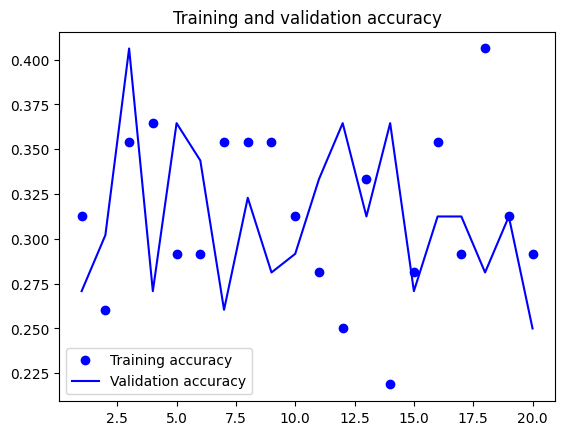

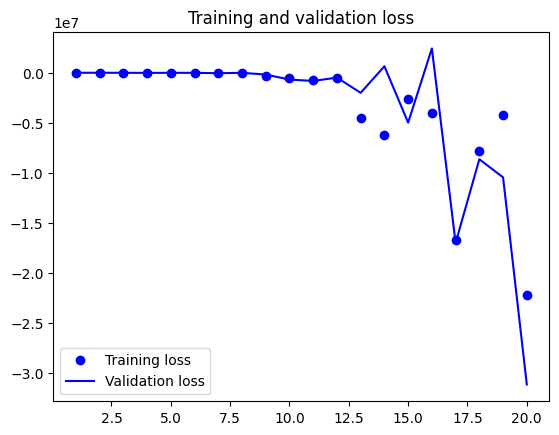

In [12]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plotting
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [13]:
test_model = keras.models.load_model(
"model/GPU_convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5664 - loss: -0.3416  
Test accuracy: 0.594


Final Results is a accaruy in the test data of 0.838

In [1]:
import tensorflow as tf

# Modell laden
model_path = r"model/GPU_convnet_from_scratch_with_augmentation.keras"
convnet_from_scratch = tf.keras.models.load_model(model_path)

# Modell Zusammenfassung anzeigen
convnet_from_scratch.summary()

2024-12-12 10:37:44.357437: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 10:37:44.364461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733996264.372984    4496 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733996264.375466    4496 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 10:37:44.384647: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

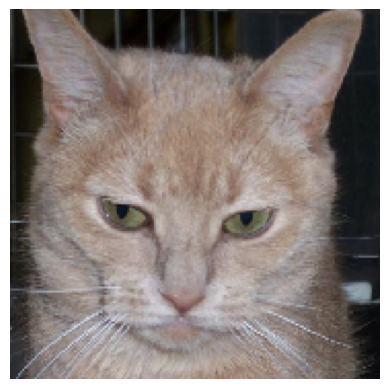

In [14]:
# Model nutzen
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Bild laden
image_path = r"cats_vs_dogs_small/test/cat/1666.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = image.load_img(image_path, target_size=(180, 180))

# Bild anzeigen
plt.imshow(img)
plt.axis("off")
plt.show()


In [15]:
# Das Bild in ein NumPy-Array umwandeln
img_array = image.img_to_array(img)
# Das Bild auf die Batch-Dimension erweitern (Modell erwartet eine Batch von Bildern)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)


(1, 180, 180, 3)


In [18]:
# Vorhersage mit dem geladenen Modell
#prediction = convnet_from_scratch.predict(img_array)
prediction = model.predict(img_array)
# Vorhersage auswerten
# Da es eine binäre Klassifikation (Hund vs. Katze) ist:
if prediction[0] > 0.5:
    print("Das Bild zeigt einen Hund.")
else:
    print("Das Bild zeigt eine Katze.")

# Ausgabe der Vorhersagewahrscheinlichkeit

# 
print("Vorhersagewahrscheinlichkeit für Hund:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Das Bild zeigt einen Hund.
Vorhersagewahrscheinlichkeit für Hund: [[1.]]


more than two class image classification

In [43]:
import os
def rename_pictures(image_path = str):
    for i, filename in enumerate(os.listdir(image_path)):
        os.rename(image_path + filename, image_path + str(i) + ".jpg")

rename_pictures("Data/Horses/")

In [44]:
import os
import shutil
import pathlib

# Ursprünglicher Datenordner
original_dir = pathlib.Path("Data")  # Oberordner der Kategorien
new_base_dir = pathlib.Path("cats_vs_dogs_vs_horses")  # Zielbasisordner

def make_subset(subset_name, start_index, end_index):
    # Kategorien (Ordner: Cat, Dog, Horses)
    for category in ("Cat", "Dog", "Horses"):
        # Neues Zielverzeichnis erstellen
        dir = new_base_dir / subset_name / category.lower()  # Kategorienamen in Kleinbuchstaben
        os.makedirs(dir, exist_ok=True)  # Ordner erstellen, falls nicht vorhanden

        # Bilder dieser Kategorie auswählen
        for i in range(start_index, end_index):
            # Versuche beide möglichen Dateiendungen (.jpg und .png)
            for ext in (".jpg", ".png"):
                fname = f"{i}{ext}"
                src = original_dir / category / fname
                dst = dir / fname

                # Datei kopieren, wenn sie existiert
                if src.exists():
                    shutil.copyfile(src, dst)
                    break  # Falls eine passende Datei gefunden wurde, zur nächsten Zahl wechseln

# Teilmengen erstellen
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=1862)


In [36]:
train_dataset = image_dataset_from_directory(
    "cats_vs_dogs_vs_horses/train",
    image_size=(180, 180),
    batch_size=32)
    
validation_dataset = image_dataset_from_directory(
    "cats_vs_dogs_vs_horses/validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "cats_vs_dogs_vs_horses/test",
    image_size=(180, 180),
    batch_size=32)

# Begrenze die Anzahl der Bilder auf 100
train_dataset = train_dataset.take(100 // 32)  # Nimm ca. 100 Bilder (32 Bilder pro Batch)
validation_dataset = validation_dataset.take(100 // 32)
test_dataset = test_dataset.take(100 // 32)

# Optional: Überprüfe die Größe der Datensätze
print(f"Train dataset batches: {len(train_dataset)}")
print(f"Validation dataset batches: {len(validation_dataset)}")
print(f"Test dataset batches: {len(test_dataset)}")


Found 2999 files belonging to 3 classes.
Found 1500 files belonging to 3 classes.
Found 1086 files belonging to 3 classes.
Train dataset batches: 3
Validation dataset batches: 3
Test dataset batches: 3


In [37]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [38]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [39]:
# Input of the model

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(3, activation="softmax")(x)
multiclass_model = keras.Model(inputs=inputs, outputs=outputs)

In [40]:
multiclass_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        37,635 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,019,075 (3.89 MB)

 Trainable params: 1,017,603 (3.88 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
multiclass_model.compile(optimizer="adam", 
                         loss="sparse_categorical_crossentropy", 
                         metrics=["accuracy"])

callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="model/GPU_multiclass_model.keras",
save_best_only=True,
monitor="val_loss")
]


In [ ]:
with tf.device('/GPU:0'):
    history = multiclass_model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

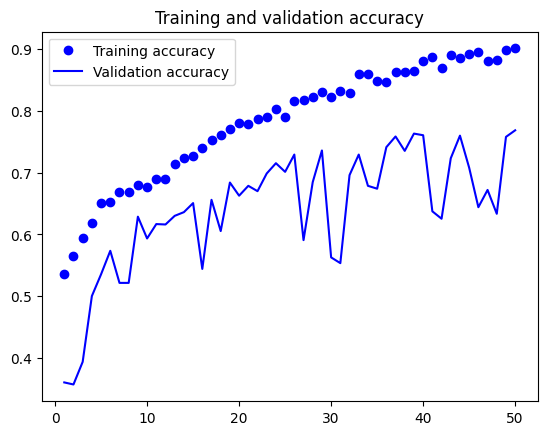

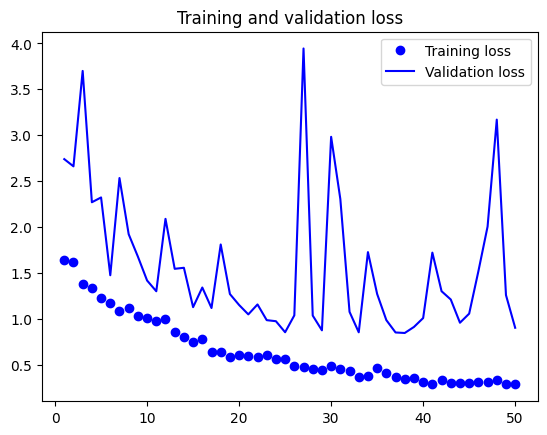

In [52]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plotting
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [53]:
test_GPU_multiclass_model = keras.models.load_model(
"model/GPU_multiclass_model.keras")
test_loss, test_acc = test_GPU_multiclass_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

30/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7572 - loss: 0.8810

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7553 - loss: 0.8879
Test accuracy: 0.743


In [5]:
import tensorflow as tf

# Modell laden
model_path = "model/GPU_multiclass_model.keras"
GPU_multiclass_model = tf.keras.models.load_model(model_path)

# Modell Zusammenfassung anzeigen
#GPU_multiclass_model.summary()

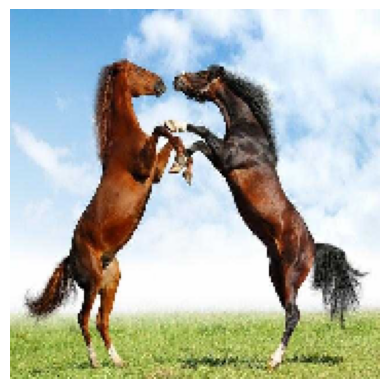

In [15]:
# Model nutzen
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Bild laden
image_path = "cats_vs_dogs_vs_horses/test/horses/1602.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = image.load_img(image_path, target_size=(180, 180))

# Bild anzeigen
plt.imshow(img)
plt.axis("off")
plt.show()


In [16]:
# Das Bild in ein NumPy-Array umwandeln
img_array = image.img_to_array(img)
# Das Bild auf die Batch-Dimension erweitern (Modell erwartet eine Batch von Bildern)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)


(1, 180, 180, 3)


In [17]:
import numpy as np

# Vorhersage mit dem geladenen Modell
prediction_GPU_multiclass_model = GPU_multiclass_model.predict(img_array)

# Klasse mit der höchsten Wahrscheinlichkeit auswählen
predicted_class = np.argmax(prediction_GPU_multiclass_model[0])

# Vorhersage auswerten
class_labels = ["Katze", "Hund", "Pferd"]  # Labels entsprechend den Klassen
print(f"Das Bild zeigt ein(e): {class_labels[predicted_class]}")

# Wahrscheinlichkeiten anzeigen
print("Vorhersagewahrscheinlichkeiten:", prediction_GPU_multiclass_model[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Das Bild zeigt ein(e): Pferd
Vorhersagewahrscheinlichkeiten: [8.9430640e-18 4.3003088e-15 1.0000000e+00]


In [2]:
from tensorflow.keras.utils import image_dataset_from_directory
import os

2024-12-25 16:38:12.383920: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-25 16:38:12.391351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735141092.400147   64178 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735141092.402655   64178 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-25 16:38:12.412366: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:

print(os.getcwd())
validation_dataset = image_dataset_from_directory(
                "Validation/",
                image_size=(180, 180),
                batch_size=32
            )

/home/riccardodandrea/Schreibtisch/Github/SceneDetect
Found 510 files belonging to 1 classes.


I0000 00:00:1735141094.469626   64178 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13803 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


In [17]:

import os
import shutil
def remove_folders_but_keep_images(main_folder):
    # Durchlaufe alle Unterordner und Dateien im Hauptordner
    for root, dirs, files in os.walk(main_folder, topdown=False):
        for file in files:
            file_path = os.path.join(root, file)
            # Verschiebe die Datei in den Hauptordner
            shutil.move(file_path, main_folder)
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            # Lösche den leeren Unterordner
            os.rmdir(dir_path)

# Hauptordner hier angeben
main_folder = "/home/riccardodandrea/Downloads/archive/imagenet-mini/train"
remove_folders_but_keep_images(main_folder)

In [8]:
import os
import random
import shutil

def select_random_images(source_folder, target_folder, num_images):
    # Erstelle den Zielordner, falls er nicht existiert
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Durchlaufe alle Dateien im Quellordner und filtere nur die Bilddateien
    all_files = []
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Bildformate
                all_files.append(os.path.join(root, file))
    
    # Wähle zufällig 'num_images' Bilder aus
    selected_files = random.sample(all_files, num_images)
    
    # Kopiere die ausgewählten Bilder in den Zielordner
    for file in selected_files:
        shutil.copy(file, target_folder)
    
    print(f"{num_images} zufällige Bilder wurden in {target_folder} gespeichert.")

# Quellordner und Zielordner festlegen
source_folder = "/home/riccardodandrea/Downloads/archive/imagenet-mini/train"
target_folder = "UploadedFile/Train/randomImages"
num_images = 500  # Anzahl der zufällig auszuwählenden Bilder

select_random_images(source_folder, target_folder, num_images)


500 zufällige Bilder wurden in UploadedFile/Train/randomImages gespeichert.


In [9]:
import os

def rename_images_to_numeric(folder_path):
    # Hole alle Dateien im Ordner
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Filtere nur Bilddateien
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    
    # Sortiere die Bilddateien (optional, wenn eine feste Reihenfolge gewünscht ist)
    image_files.sort()
    
    # Umbenenne die Bilder numerisch
    for idx, image_file in enumerate(image_files):
        old_path = os.path.join(folder_path, image_file)
        new_name = f"{idx}.jpeg"
        new_path = os.path.join(folder_path, new_name)
        
        # Benenne die Datei um
        os.rename(old_path, new_path)
    
    print(f"Alle {len(image_files)} Bilder wurden numerisch umbenannt und in .jpeg umgewandelt.")

# Verzeichnis angeben
folder_path = "UploadedFile/Train/randomImages"
rename_images_to_numeric(folder_path)


Alle 500 Bilder wurden numerisch umbenannt und in .jpeg umgewandelt.


In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory
import os
os.chdir("/home/riccardodandrea/Schreibtisch/Github/SceneDetect")


In [5]:
train_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small/train",
    image_size=(180, 180),
    batch_size=32)
    
validation_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small/validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small/test",
    image_size=(180, 180),
    batch_size=32)

Found 1999 files belonging to 2 classes.


I0000 00:00:1736161529.176542   18964 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1206 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 1000 files belonging to 2 classes.
Found 1987 files belonging to 2 classes.


In [6]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [7]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss="binary_crossentropy",
            optimizer="rmsprop",
            metrics=["accuracy"])

In [10]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    #callbacks=callbacks
    )

Epoch 1/20


I0000 00:00:1736161607.841885  102217 cuda_dnn.cc:529] Loaded cuDNN version 90300


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5082 - loss: 0.7818

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5081 - loss: 0.7808 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 2/20
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4905 - loss: 0.6944

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4915 - loss: 0.6945 - val_accuracy: 0.5170 - val_loss: 0.6918
Epoch 3/20
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5336 - loss: 0.6917

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5337 - loss: 0.6917 - val_accuracy: 0.4990 - val_loss: 0.8040
Epoch 4/20
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5763 - loss: 0.6876

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5767 - loss: 0.6874 - val_accuracy: 0.5850 - val_loss: 0.6752
Epoch 5/20
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6042 - loss: 0.6692

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6047 - loss: 0.6692 - val_accuracy: 0.5990 - val_loss: 0.6655
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6232 - loss: 0.6562

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6231 - loss: 0.6562 - val_accuracy: 0.6110 - val_loss: 0.6467
Epoch 7/20
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6498 - loss: 0.6272

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6501 - loss: 0.6272 - val_accuracy: 0.5890 - val_loss: 0.6908
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6534 - loss: 0.6272

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6536 - loss: 0.6271 - val_accuracy: 0.6260 - val_loss: 0.6248
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7047 - loss: 0.5822 - val_accuracy: 0.6740 - val_loss: 0.6075


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6754 - loss: 0.6172

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6754 - loss: 0.6170 - val_accuracy: 0.6340 - val_loss: 0.7069
Epoch 11/20
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6975 - loss: 0.5892

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6975 - loss: 0.5889 - val_accuracy: 0.5890 - val_loss: 0.7055
Epoch 12/20
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6686 - loss: 0.6362

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6690 - loss: 0.6349 - val_accuracy: 0.7020 - val_loss: 0.5627
Epoch 13/20
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7216 - loss: 0.5668

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7214 - loss: 0.5667 - val_accuracy: 0.7170 - val_loss: 0.5542
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7308 - loss: 0.5535 - val_accuracy: 0.7320 - val_loss: 0.5514
Epoch 15/20


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7288 - loss: 0.5476

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7287 - loss: 0.5472 - val_accuracy: 0.6890 - val_loss: 0.6393
Epoch 16/20
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7507 - loss: 0.5272

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7501 - loss: 0.5272 - val_accuracy: 0.7540 - val_loss: 0.4988
Epoch 17/20
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7454 - loss: 0.5214

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7451 - loss: 0.5216 - val_accuracy: 0.7410 - val_loss: 0.5378
Epoch 18/20
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7554 - loss: 0.5166

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7553 - loss: 0.5160 - val_accuracy: 0.7420 - val_loss: 0.5301
Epoch 19/20
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7620 - loss: 0.4962

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7617 - loss: 0.4966 - val_accuracy: 0.7150 - val_loss: 0.6236
Epoch 20/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7543 - loss: 0.5104 - val_accuracy: 0.7470 - val_loss: 0.5153


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


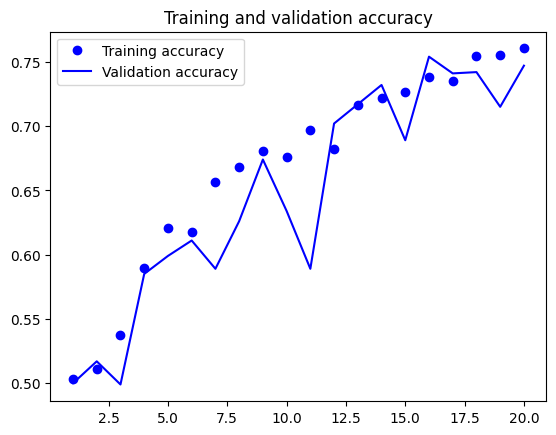

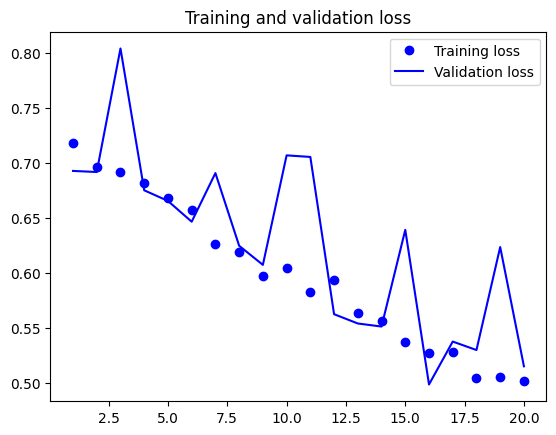

In [11]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plotting
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [13]:

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

60/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7507 - loss: 0.5091

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7502 - loss: 0.5101
Test accuracy: 0.743
